### Slide 1

jajaja

this is the subslide 

these are some notes

<img src="images/image.png">

# Chapter 1
Stuff you need to know...

Most of you probably know `pandas` and have used `TimeSeries` and/or `DataFrame` objects 

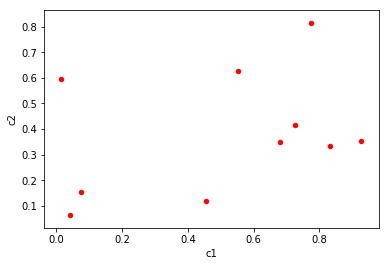

In [95]:
import numpy as np
import pandas as pd
%matplotlib inline
data = np.random.random((10, 2))
df = pd.DataFrame(data, columns = ['c1', 'c2'])
df.plot.scatter('c1', 'c2', color='red');

### There's also a thing called `GeoJson`

## Making a Choropleth

This is what we're going to make: 

In [16]:
from IPython.display import HTML, IFrame
IFrame(src='tokyo_wards_choropleth.html', width=1024, height=600)

## Steps
1. collect data to plot on map
2. collect ward (区) boundaries 
3. assign data to wards and calculate statistics
4. use `folium` to plot statistics on map (choropleth map)

## 1. collect data to plot

## 2. collect ward boundaries


In [22]:
import os
import json
import requests


url = 'https://raw.githubusercontent.com/dataofjapan/land/master/tokyo.geojson'
filename = 'tokyo_wards.geojson'
### Load wards geojson data, or download if not already on disk
if not os.path.exists(filename):
    r = requests.get(url)
    with open(filename, 'w') as f:
        f.write(json.dumps(json.loads(r.content.decode())))

with open(filename) as f: 
    wards = json.loads(f.read())

Let's see what we have

In [96]:
!du -h tokyo_wards.geojson

5.8M	tokyo_wards.geojson


In [51]:
from IPython.lib.pretty import pprint

pprint(wards['features'][0], max_seq_length = 10)

{'geometry': {'coordinates': [[[139.821051, 35.815077],
    [139.821684, 35.814887],
    [139.822599, 35.814509],
    [139.8229070000001, 35.81437],
    [139.822975, 35.814339],
    [139.822977, 35.814338],
    [139.823188, 35.814242],
    [139.823348, 35.81417],
    [139.823387, 35.814152],
    [139.823403, 35.814138],
    ...]],
  'type': 'Polygon'},
 'properties': {'area_en': 'Tokubu',
  'area_ja': '都区部',
  'code': 131211,
  'ward_en': 'Adachi Ku',
  'ward_ja': '足立区'},
 'type': 'Feature'}


I wish I could efficiently handle such data...

... I wish there was something like pandas for geospatial data, with, maybe I dunno, a geo-dataframe or something?

In [63]:
import geopandas as gpd
wards = gpd.GeoDataFrame.from_file('tokyo_wards.geojson')

In [64]:
origin_shinjuku = (35.7035007,139.6524644)
m = folium.Map(location=origin_shinjuku, tiles='Stamen Toner', zoom_start=11)
folium.GeoJson(wards.to_json()).add_to(m)
m

AttributeError: 'dict' object has no attribute 'to_json'

What do we need? 

In [11]:
import folium
import numpy as np
import pandas as pd
import geopandas as gpd

Done :)